In [9]:
import modes
import spectra
from util import trapz, backtrapz, deriv

import numpy as np
from matplotlib import pyplot as plt

In [10]:
# numerical parameters
NT = 10000
NX = 10000
NK = 2000
L_MAX = 2500
xmin = 0.01
xmax = 3000
a0 = 1.e-6
a_rec = 1/1100

# arrays
A = np.linspace(a0, a_rec, NT)
K = np.linspace(.1, 3000, NK)
L = np.array([i for i in range(2, 50, 1)]+[i for i in range(50, 200, 5)] +
                  [i for i in range(200, L_MAX, 20)])
NL = len(L)
X = np.linspace(xmin, xmax, NX)
JLX, DJLX = spectra.get_bessels(L, X)

Bessel functions loaded from file.


In [11]:
# physical parameters
h = 0.5
OmegaM0 = 1.0
OmegaB0 = 0.05
OmegaR0 = 4.2e-5/h**2
OmegaN0 = OmegaR0*(1-1/1.68)
OmegaG0 = OmegaR0 - OmegaN0
OmegaC0 = OmegaM0 - OmegaB0
wC = np.zeros(NT)
wN = np.ones(NT)*1/3
cs2C = np.zeros((NT, NK))
cs2N = np.ones((NT, NK))*1/3

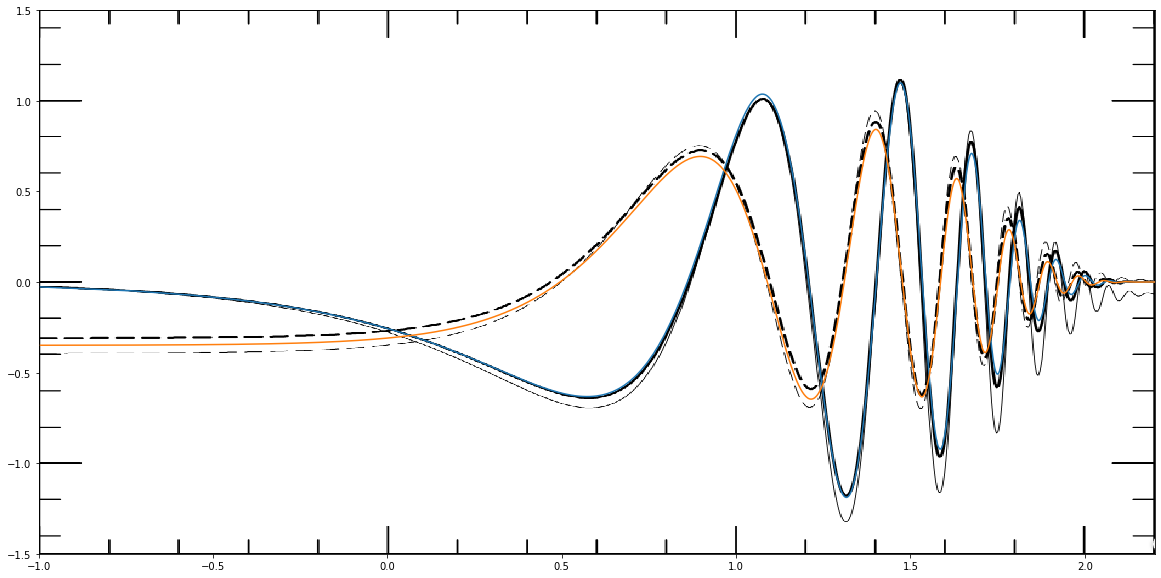

In [12]:
# Solve the ODE and get the source terms.
Y, TAU = modes.solve_3fld(A, K, wC, cs2C, wN, cs2N, OmegaB0, OmegaC0,
           OmegaG0, OmegaN0)
DOP = -Y[-1,2,:]
SW = -Y[-1,0,:] - Y[-1,1,:]/4
tau_rec = TAU[-1]

# Calculate the damping factor
OmegaM0 = OmegaB0 + OmegaC0
tau_r = .5*(OmegaM0/a_rec)**.5
tau_s = 0.6 * OmegaM0**.25 * OmegaB0**-.5 * a_rec**.75 * h**-.5 / tau_r
#tau_rec = tau_r
T = np.exp(-2*(K*tau_s)**2 - (.03*K*tau_rec)**2)
T = np.exp(-K**2 * tau_s**2)

# plot the seljak graph
fig, ax = plt.subplots(figsize=(20, 10))
img = plt.imread("img/seljak_1.png")
ax.imshow(img, extent=[-1, 2.2, -1.5, 1.5],aspect='auto')
plt.xlim(-1,2.2)
plt.ylim(-1.5,1.5)

#plot the damped source terms
plt.plot(np.log10(K/tau_r),DOP*T, )
plt.plot(np.log10(K/tau_r),SW*T)

In [13]:
%timeit Cl = spectra.get_Cl_3fld(L, L, X, JLX, DJLX, A, K, wC, cs2C, wN, cs2N, OmegaB0, OmegaC0, OmegaG0, OmegaN0, h)

1.8 s ± 72 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


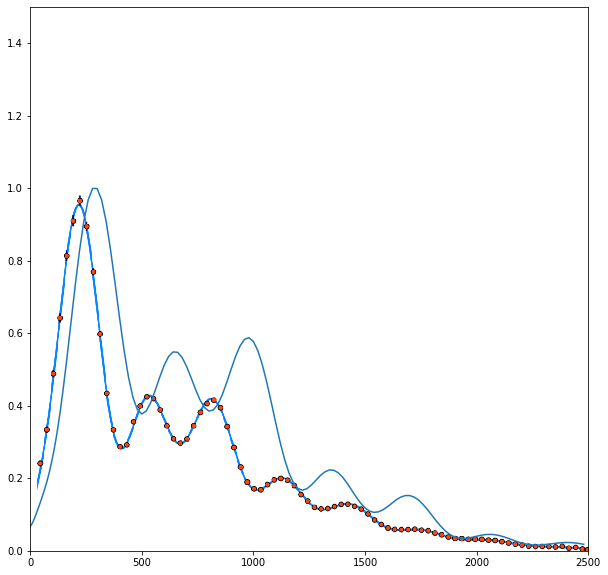

In [14]:

h = .6

OmegaM0 = .3089
OmegaB0 = 0.022/h**2
OmegaR0 = 4.2e-5/h**2
OmegaN0 = OmegaR0*.405
OmegaG0 = OmegaR0 - OmegaN0
OmegaC0 = OmegaM0 - OmegaB0

Cl = spectra.get_Cl_3fld(L, L, X, JLX, DJLX, A, K, wC, cs2C, wN, cs2N,
                                  OmegaB0, OmegaC0, OmegaG0, OmegaN0, h)

fig, ax = plt.subplots(figsize=(10, 10))
img = plt.imread("img/Cl_planck_30p.png")
ax.imshow(img, extent=[30, 2500, 0, 1],aspect='auto')
plt.xlim(0, 2500)
plt.ylim(0,1.5)

plt.plot(L,Cl/max(Cl))